In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

conn = sqlite3.connect(':memory:')
conn.execute('''
    CREATE TABLE employees (
        id INTEGER PRIMARY KEY,
        name TEXT,
        department TEXT,
        salary int,
        hours int
    )
''')

conn.executemany('INSERT INTO employees (name, department,salary,hours) VALUES (?, ?,?,?)',
                 [('Alice', 'Engineering',40000,40),
                  ('Bob', 'HR',50000,40),
                  ('Charlie', 'Engineering',70000,30)])

df = pd.read_sql_query("SELECT * FROM employees", conn)

print(df)

   id     name   department  salary  hours
0   1    Alice  Engineering   40000     40
1   2      Bob           HR   50000     40
2   3  Charlie  Engineering   70000     30


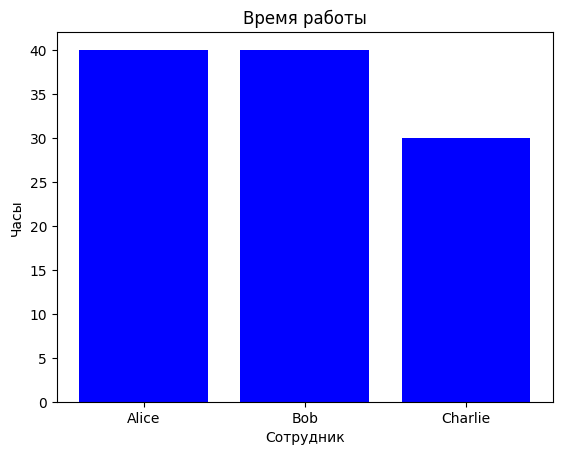

In [23]:
plt.bar(df["name"],df["hours"],color="blue")
plt.title("Время работы")
plt.xlabel("Сотрудник")
plt.ylabel("Часы")
plt.show()

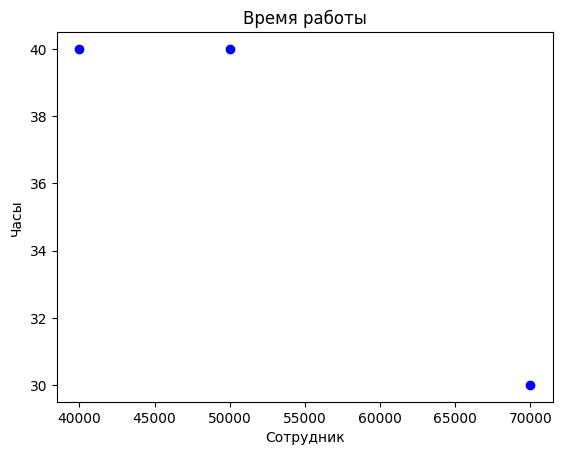

In [25]:
plt.scatter(df["salary"],df["hours"],color="blue")
plt.title("Время работы")
plt.xlabel("Сотрудник")
plt.ylabel("Часы")
plt.show()

In [27]:
hist_data=pd.DataFrame({'values': np.random.normal(100,20,1000),})

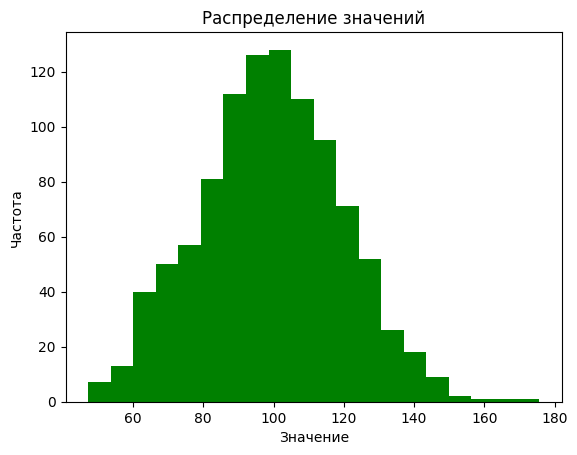

In [31]:
plt.hist(hist_data["values"],bins=20,color="green")
plt.title("Распределение значений")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

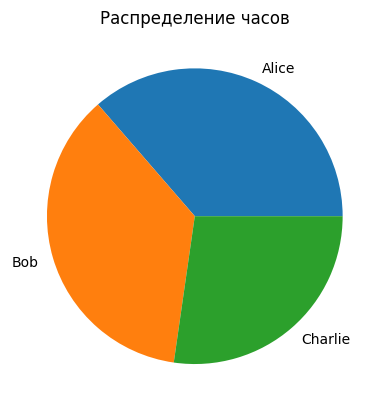

In [32]:
plt.pie(df["hours"],labels=df["name"])
plt.title("Распределение часов")
plt.show()

In [6]:
charactersData=pd.read_csv('/content/simpsons_characters.xls')
episodesData=pd.read_csv('/content/simpsons_episodes.xls')
locationsData=pd.read_csv('/content/simpsons_locations.xls')
scriptData=pd.read_csv('/content/simpsons_script_lines.csv',on_bad_lines='skip')

/tmp/ipython-input-1535038101.py:4: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  scriptData=pd.read_csv('/content/simpsons_script_lines.csv',on_bad_lines='skip')


In [34]:
scriptData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158271 non-null  int64  
 1   episode_id          158271 non-null  int64  
 2   number              158271 non-null  int64  
 3   raw_text            158271 non-null  object 
 4   timestamp_in_ms     158271 non-null  object 
 5   speaking_line       158271 non-null  object 
 6   character_id        140750 non-null  object 
 7   location_id         157864 non-null  float64
 8   raw_character_text  140749 non-null  object 
 9   raw_location_text   157863 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


In [35]:
scriptData.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


Задачи:

1. Найти топ 5 персонажей по количеству реплик

2. Как часто персонажи общяются друг с другом

3. Какая локация самая поплулярная

In [36]:
scriptData.iloc[3]

,3
id,9552
episode_id,32
number,212
raw_text,Lisa Simpson: That life is worth living.
timestamp_in_ms,864000
speaking_line,True
character_id,9.0
location_id,3.0
raw_character_text,Lisa Simpson
raw_location_text,Springfield Elementary School


In [63]:
scriptData["raw_character_text"].value_counts()

,count
raw_character_text,
Homer Simpson,29842
Marge Simpson,14159
Bart Simpson,13777
Lisa Simpson,11502
C. Montgomery Burns,3172
...,...
MRS. HOOVER,1
MR. BURNS' GEOMETRIC SHAPES,1
Female Newscaster,1


In [61]:
def drawTopChars(charsCount):
  charNames=scriptData["raw_character_text"].value_counts()[:charsCount].index
  charValues=scriptData["raw_character_text"].value_counts()[:charsCount].tolist()

  plt.figure(figsize=(8,8))
  plt.pie(charValues, labels=charNames)
  plt.title("Топ "+str(charsCount)+" популярных персонажей" )
  plt.show()

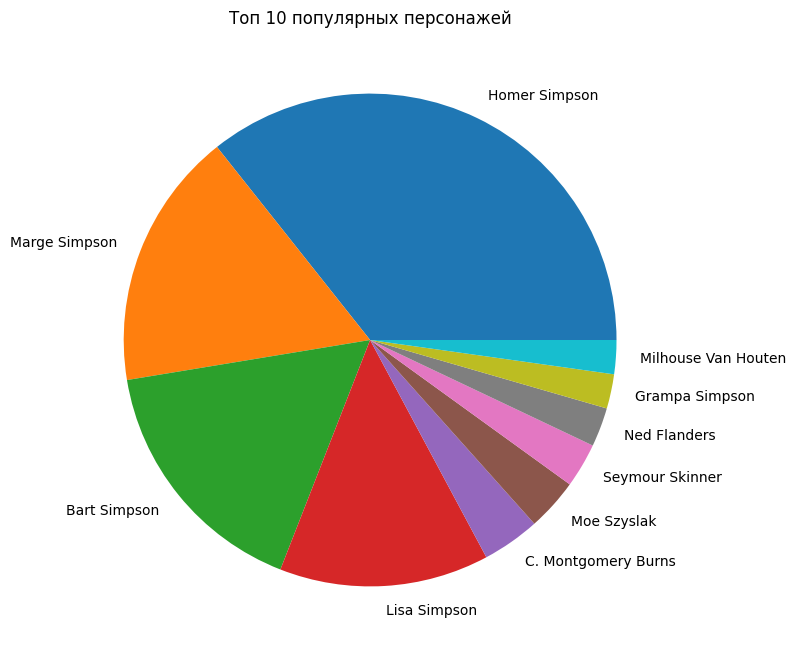

In [62]:
drawTopChars(10)

In [70]:
def showDialogue(charNumber):
  charNames=scriptData["raw_character_text"].value_counts()[:charNumber].index
  filtered=scriptData[scriptData.raw_character_text.isin(charNames)]

  dialogue={
      "x1": filtered.raw_character_text[:-1].values,
      "x2": filtered.raw_character_text[1:].values
  }

  dialogue=pd.DataFrame(dialogue)
  dialogue = dialogue[dialogue.x1 != dialogue.x2]
  dialogue = pd.get_dummies(dialogue.x1).groupby(dialogue.x2).sum()

  plt.figure(figsize=(9,7))

  im=plt.imshow(dialogue.values, cmap='viridis',aspect="auto")

  plt.xticks(np.arange(len(dialogue.columns)), dialogue.columns, rotation=45, ha="right")
  plt.xticks(np.arange(len(dialogue.index)), dialogue.index)

  for i in range (len(dialogue.index)):
    for j in range(len(dialogue.columns)):
      plt.text(j,i,int(dialogue.values[i,j]),ha="center", va="center",color="w")

  plt.colorbar(im)
  plt.title("Диалоги персонажей")
  plt.xlabel("Персанаж 1")
  plt.ylabel("Персанаж 2")
  plt.show()




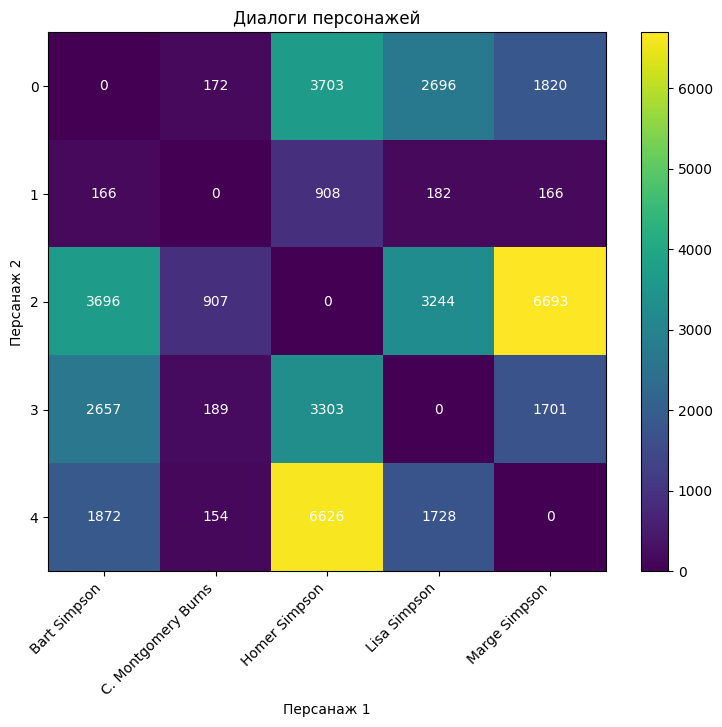

In [74]:
showDialogue(5)

In [125]:
def drawTopLocation(locationCount):
  locNames=scriptData["raw_location_text"].value_counts()[:locationCount].index
  locValues=scriptData["raw_location_text"].value_counts()[:locationCount].tolist()

  plt.figure(figsize=(8,8))
  plt.barh(locNames, locValues)
  plt.title("Топ "+str(locationCount)+" популярных локаций" )

  for i,v in enumerate(locValues):
    plt.text(v,i,str(v),ha="center", va="center",color="black")
  plt.savefig("text.jpg")
  plt.show()

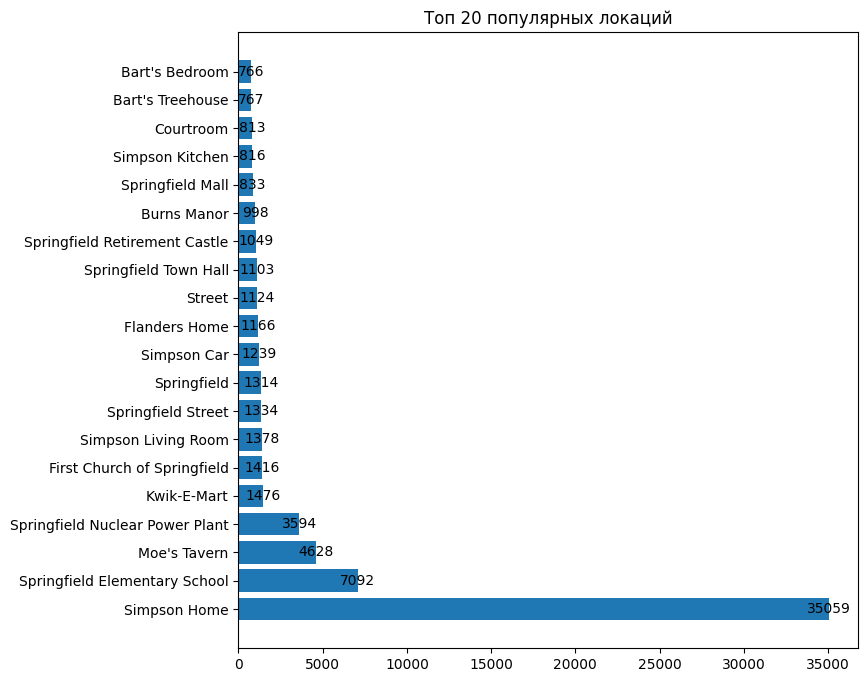

In [126]:
drawTopLocation(20)